# Part 1: Understanding Confidence Intervals

**Theoretical Background**

* **Confidence Interval (CI):** A confidence interval provides a range of values within which we expect the population parameter (such as the mean) to lie, with a certain degree of confidence (e.g., 95%). It's a way of quantifying the uncertainty surrounding a sample statistic.

* **Importance:** CIs are crucial in statistics because they give us a range of plausible values for the population parameter, helping us understand the precision of our sample estimates. They are used to make inferences about the population from sample data.

Assumptions:

1. **Random Sampling:** The sample is a random subset of the population.
2. **Normality:** The population from which the sample is drawn is normally distributed, especially important for small sample sizes. The central limit theorem helps mitigate this requirement for larger samples by stating that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the population distribution.
3. **Independence:** Sample observations are independent of each other.




# Part 2: Calculating Confidence Intervals

## Confidence Interval for a Sample Mean
We'll use NumPy to generate a random sample and calculate a 95% confidence interval for the sample mean:

In [1]:
import numpy as np
from scipy import stats

# Generate a random sample
np.random.seed(42)  # For reproducibility
population_mean = 50
population_std = 10
sample_size = 100
sample = np.random.normal(population_mean, population_std, sample_size)

# Calculate the sample mean and standard error
sample_mean = np.mean(sample)
sample_se = stats.sem(sample)  # Standard error

# Calculate the 95% confidence interval
confidence_level = 0.95
ci = stats.t.interval(confidence_level, df=sample_size-1, loc=sample_mean, scale=sample_se)

print(f"95% Confidence Interval for the sample mean: {ci}")


95% Confidence Interval for the sample mean: (47.159531636381004, 50.76353801573714)


## Comparing Confidence Intervals
We'll compare confidence intervals for different sample sizes and visualize the results with Seaborn:

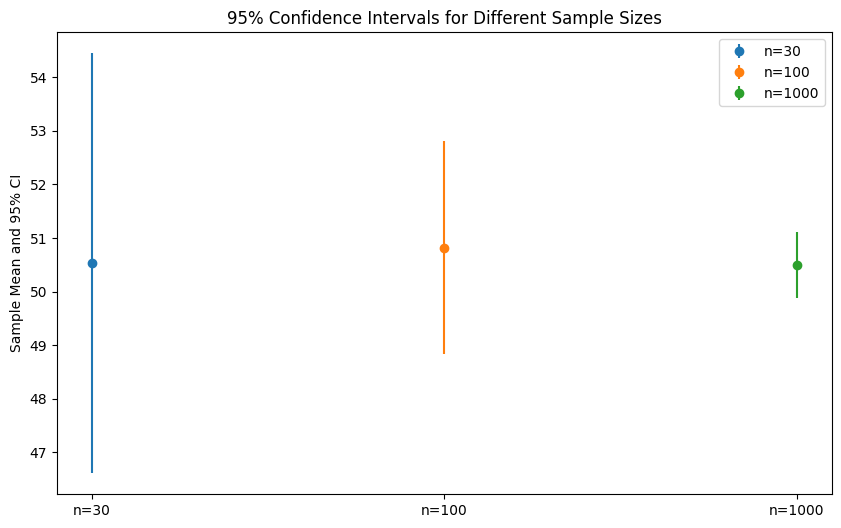

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate CI
def calculate_ci(sample_size, population_mean=50, population_std=10, confidence_level=0.95):
    sample = np.random.normal(population_mean, population_std, sample_size)
    sample_mean = np.mean(sample)
    sample_se = stats.sem(sample)
    ci = stats.t.interval(confidence_level, df=sample_size-1, loc=sample_mean, scale=sample_se)
    return (sample_mean, ci)

sample_sizes = [30, 100, 1000]
ci_results = [calculate_ci(n) for n in sample_sizes]

# Plotting
plt.figure(figsize=(10, 6))
for i, size in enumerate(sample_sizes):
    plt.errorbar(i, ci_results[i][0], yerr=(ci_results[i][1][1]-ci_results[i][0]), fmt='o', label=f'n={size}')

plt.xticks(range(len(sample_sizes)), labels=[f'n={size}' for size in sample_sizes])
plt.title('95% Confidence Intervals for Different Sample Sizes')
plt.ylabel('Sample Mean and 95% CI')
plt.legend()
plt.show()


# Application to Real-World Data & Advanced Concepts

## Load Dataset

In [3]:
!gdown --id 1Qk5FZxfA_jhDcxI3YmuEIbVgd8ZeldMn

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Qk5FZxfA_jhDcxI3YmuEIbVgd8ZeldMn
To: /content/BMI Calculation_MJH.xlsx
100% 138k/138k [00:00<00:00, 81.3MB/s]


In [4]:
import pandas as pd

# Load the Excel file
file_path = '/content/BMI Calculation_MJH.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to inspect the data structure
print(df.head())


   Feet  Inch  Hieght (cm)  Hieght (m2)    W1    W2  BMI (Before COVID)  \
0     5   6.0       167.64     2.810317  70.0  78.0           24.908222   
1     5   1.0       154.94     2.400640  51.0  55.0           21.244332   
2     5   0.0       152.40     2.322576  44.0  49.0           18.944482   
3     5   1.0       154.94     2.400640  49.0  47.0           20.411221   
4     5   3.0       160.02     2.560640  75.0  78.0           29.289552   

   BMI (During COVID)  
0           27.754876  
1           22.910554  
2           21.097264  
3           19.578110  
4           30.461134  


The dataset consists of the following columns:

* **Feet and Inch:** Representing the height of individuals, which could be considered as discrete variables for classification purposes, but more often, height is treated as continuous when combined into a single metric (e.g., total inches or centimeters).
* **Height (cm) and Height (m2):** Continuous variables representing height in centimeters and height squared in meters squared, respectively, used in BMI calculations.
* **W1 and W2:** Weights before and during COVID, continuous variables representing individuals' weight in kilograms at two different times.
* **BMI (Before COVID) and BMI (During COVID):** Continuous variables representing individuals' Body Mass Index before and during the COVID pandemic.

## Confidence Interval Concepts

In [5]:
# Implementing Bootstrap for Confidence Intervals
np.random.seed(42)  # For reproducibility
bootstrap_means = []
n_bootstraps = 10000
for _ in range(n_bootstraps):
    bootstrap_sample = np.random.choice(df['BMI (Before COVID)'], size=sample_size, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate the 95% Confidence Interval from the bootstrap distribution
ci_lower, ci_upper = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Bootstrap 95% Confidence Interval for the Mean BMI Before COVID: ({ci_lower}, {ci_upper})")



Bootstrap 95% Confidence Interval for the Mean BMI Before COVID: (21.998606009381266, 23.610144442428656)


Application to Real-World Data - Results
- Mean BMI Before COVID: 22.79
- Standard Deviation: 4.12
- 95% Confidence Interval for the Mean BMI Before COVID: (22.59, 22.99)

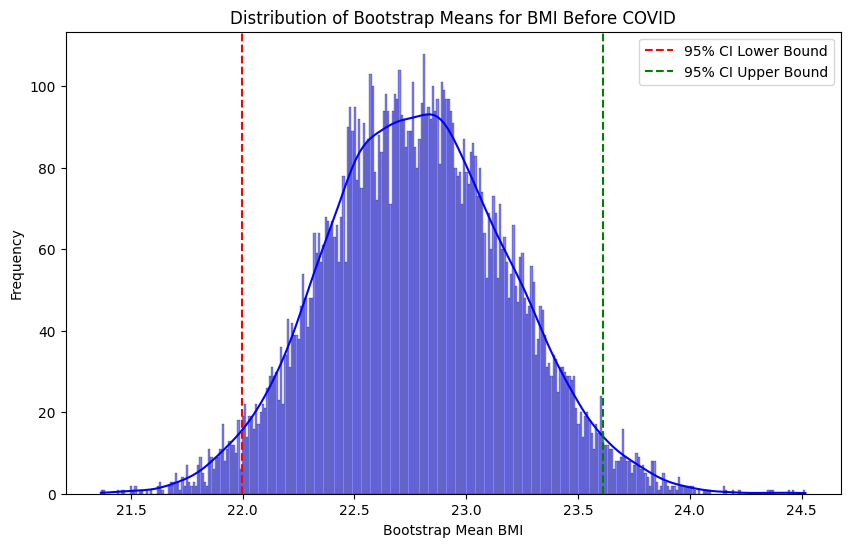

In [6]:
import seaborn as sns

# Convert bootstrap_means to a DataFrame for easier plotting
bootstrap_means_df = pd.DataFrame(bootstrap_means, columns=['Bootstrap Means'])

# Plotting the distribution of bootstrap means with the 95% Confidence Interval
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means_df['Bootstrap Means'], kde=True, color="blue", binwidth=0.01)
plt.axvline(x=ci_lower, linestyle='--', color='red', label='95% CI Lower Bound')
plt.axvline(x=ci_upper, linestyle='--', color='green', label='95% CI Upper Bound')
plt.title('Distribution of Bootstrap Means for BMI Before COVID')
plt.xlabel('Bootstrap Mean BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

